In [2]:
#imports

import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
#designate the csv file data path
data_load = Path ('Resources/Housing.csv')

# uniform housing
housing = pd.read_csv(data_load,encoding="utf-8")

# Display the first few rows of the original DataFrame
print("Original DataFrame:")
(housing.head())

Original DataFrame:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,"$231,300.00",2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,"$538,000.00",3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,"$180,000.00",2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,"$604,000.00",4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,"$510,000.00",3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# List of columns to drop (replace with actual column names)
columns_to_drop = ['date', 'sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Drop the specified columns and create a new DataFrame
housing = housing.drop(columns=columns_to_drop)

# Check for null and NaN values after dropping columns
print("\nNull and NaN values after dropping columns:")
print(housing.isnull().sum())




Null and NaN values after dropping columns:
id              0
 price          0
bedrooms        0
bathrooms       0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
dtype: int64


In [5]:
# Check for duplicates in the DataFrame
duplicates = housing.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

if num_duplicates > 0:
    print(f"Number of duplicate rows: {num_duplicates}")
    # Display duplicate rows
    duplicate_rows = housing[duplicates]
    print("\nDuplicate rows:")
    print(duplicate_rows)
    
    # Remove duplicates and overwrite the DataFrame
    housing = housing.drop_duplicates()
    print("\nDuplicates removed.")
else:
    print("No duplicates found.")


Number of duplicate rows: 3

Duplicate rows:
               id         price   bedrooms  bathrooms  sqft_lot  floors  \
3951   1825069031   $550,000.00          4       1.75      8447     2.0   
14983  6308000010   $585,000.00          3       2.50      5089     2.0   
20054  8648900110   $555,000.00          3       2.50      3211     2.0   

       waterfront  view  condition  yr_built  yr_renovated  zipcode      lat  \
3951            0     3          4      1936          1980    98074  47.6499   
14983           0     0          3      2001             0    98006  47.5443   
20054           0     0          3      2009             0    98027  47.5644   

          long  
3951  -122.088  
14983 -122.172  
20054 -122.093  

Duplicates removed.


In [6]:
housing.rename(columns={
    'id': 'property_id',
    'price': 'sale_price',
    'bedrooms': 'num_bedrooms',
    'bathrooms': 'num_bathrooms',
    'sqft_lot': 'lot_size',
    'floors': 'num_floors',
    'waterfront': 'is_waterfront',
    'view': 'view_rating',
    'condition': 'condition_rating',
    'yr_built': 'year_built',
    'yr_renovated': 'year_renovated',
    'zipcode': 'zip_code',
    'lat': 'latitude',
    'long': 'longitude'
}, inplace=True)


In [7]:
housing.to_csv('Resources/ModifiedHomes.csv', index=False)
print("New DataFrame saved to 'Resources/ModifiedHomes.csv'")


New DataFrame saved to 'Resources/ModifiedHomes.csv'


In [8]:
pd.read_csv(data_load,encoding="utf-8")
housing.head(10)

,property_id,price,num_bedrooms,num_bathrooms,lot_size,num_floors,is_waterfront,view_rating,condition_rating,year_built,year_renovated,zip_code,latitude,longitude
0,7229300521,"$231,300.00",2,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257
1,6414100192,"$538,000.00",3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319
2,5631500400,"$180,000.00",2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233
3,2487200875,"$604,000.00",4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393
4,1954400510,"$510,000.00",3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045
5,7237550310,"$1,225,000.00",4,4.50,101930,1.0,0,0,3,2001,0,98053,47.6561,-122.005
6,1321400060,"$257,500.00",3,2.25,6819,2.0,0,0,3,1995,0,98003,47.3097,-122.327
7,2008000270,"$291,850.00",3,1.50,9711,1.0,0,0,3,1963,0,98198,47.4095,-122.315
8,2414600126,"$229,500.00",3,1.00,7470,1.0,0,0,3,1960,0,98146,47.5123,-122.337
9,3793500160,"$323,000.00",3,2.50,6560,2.0,0,0,3,2003,0,98038,47.3684,-122.031


In [9]:
housing.dtypes

property_id           int64
 price               object
num_bedrooms          int64
num_bathrooms       float64
lot_size              int64
num_floors          float64
is_waterfront         int64
view_rating           int64
condition_rating      int64
year_built            int64
year_renovated        int64
zip_code              int64
latitude            float64
longitude           float64
dtype: object

In [10]:
# Rename the column to remove the space
housing.rename(columns={' price ': 'price'}, inplace=True)
housing['price']

0         $231,300.00 
1         $538,000.00 
2         $180,000.00 
3         $604,000.00 
4         $510,000.00 
             ...      
21608     $360,000.00 
21609     $400,000.00 
21610     $402,101.00 
21611     $400,000.00 
21612     $325,000.00 
Name: price, Length: 21610, dtype: object

In [11]:
# Remove '$' symbol from ' price' column
housing['price'] = housing['price'].str.replace('$', '').str.replace(',', '')

# Convert prices to a float 
housing['price'] = housing['price'].astype(float)
housing

,property_id,price,num_bedrooms,num_bathrooms,lot_size,num_floors,is_waterfront,view_rating,condition_rating,year_built,year_renovated,zip_code,latitude,longitude
0,7229300521,231300.0,2,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1131,3.0,0,0,3,2009,0,98103,47.6993,-122.346
21609,6600060120,400000.0,4,2.50,5813,2.0,0,0,3,2014,0,98146,47.5107,-122.362
21610,1523300141,402101.0,2,0.75,1350,2.0,0,0,3,2009,0,98144,47.5944,-122.299
21611,291310100,400000.0,3,2.50,2388,2.0,0,0,3,2004,0,98027,47.5345,-122.069


In [12]:
# check if data type for price was changed
housing.dtypes

property_id           int64
price               float64
num_bedrooms          int64
num_bathrooms       float64
lot_size              int64
num_floors          float64
is_waterfront         int64
view_rating           int64
condition_rating      int64
year_built            int64
year_renovated        int64
zip_code              int64
latitude            float64
longitude           float64
dtype: object

# EDA

In [13]:
# Generate summary statistics
summary_stats = housing['price'].describe()
summary_stats
# Convert to DataFrame
summary_stats_df = pd.DataFrame(summary_stats)

# Display the DataFrame
summary_stats_df

,price
count,2.161000e+04
mean,5.400853e+05
std,3.671522e+05
min,7.500000e+04
25%,3.216125e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [19]:
housing.columns

Index(['property_id', 'price', 'num_bedrooms', 'num_bathrooms', 'lot_size',
       'num_floors', 'is_waterfront', 'view_rating', 'condition_rating',
       'year_built', 'year_renovated', 'zip_code', 'latitude', 'longitude'],
      dtype='object')

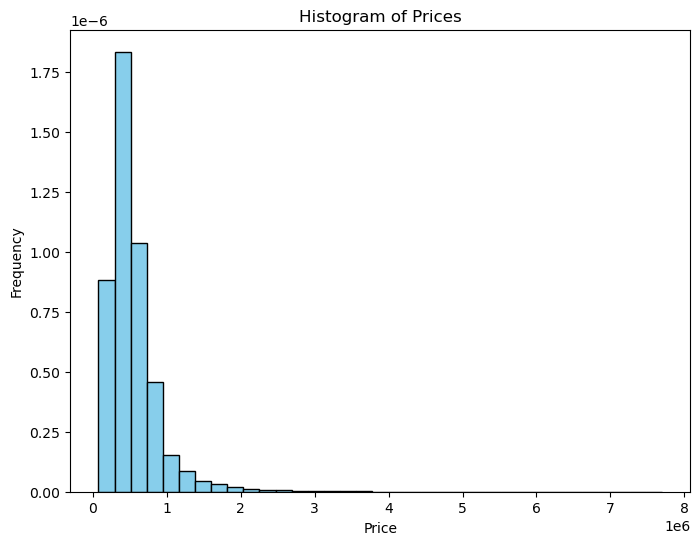

In [141]:
plt.figure(figsize=(8, 6))
plt.hist(housing['price'], bins=35, edgecolor='black', density= True, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')

plt.show()

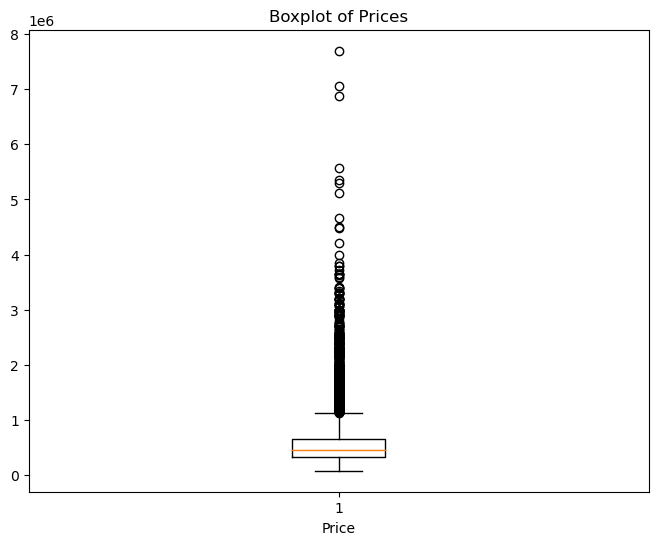

In [139]:
plt.figure(figsize=(8, 6))
plt.boxplot(housing['price'])
plt.xlabel('Price')
plt.title('Boxplot of Prices')

plt.show()

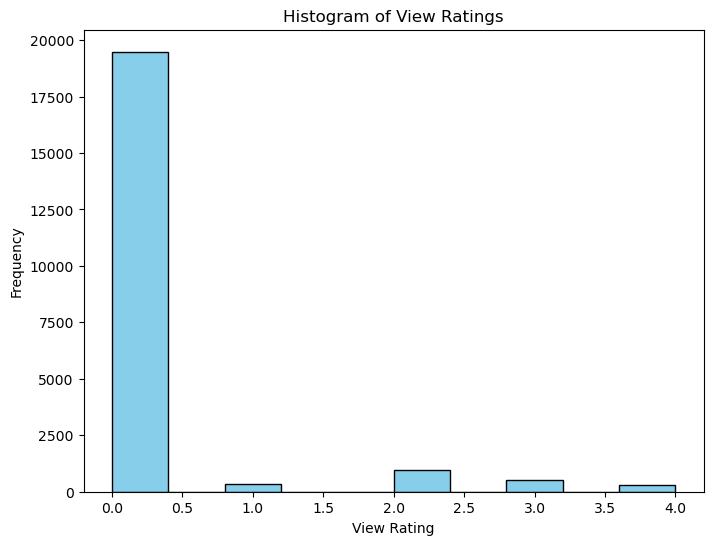

In [121]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(housing['view_rating'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('View Rating')
plt.ylabel('Frequency')
plt.title('Histogram of View Ratings')

plt.show()

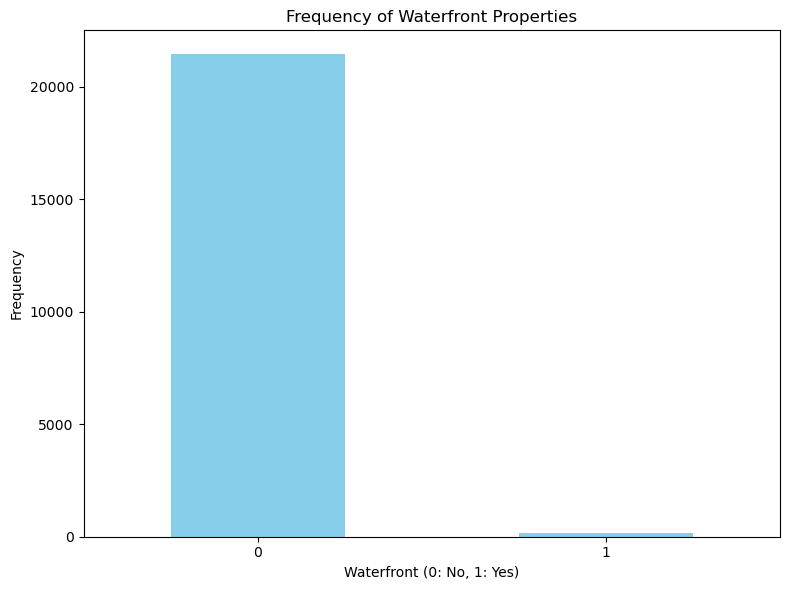

In [114]:
# # Create histogram for number of floors
# plt.figure(figsize=(8, 6))
# plt.hist(housing['is_waterfront'], bins=4, edgecolor='black', color='skyblue')
# plt.xlabel('Number of Floors')
# plt.ylabel('Frequency')
# plt.title('Histogram of Number of Floors')

# plt.show()

waterfront_counts = housing['is_waterfront'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
waterfront_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Waterfront (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.title('Frequency of Waterfront Properties')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

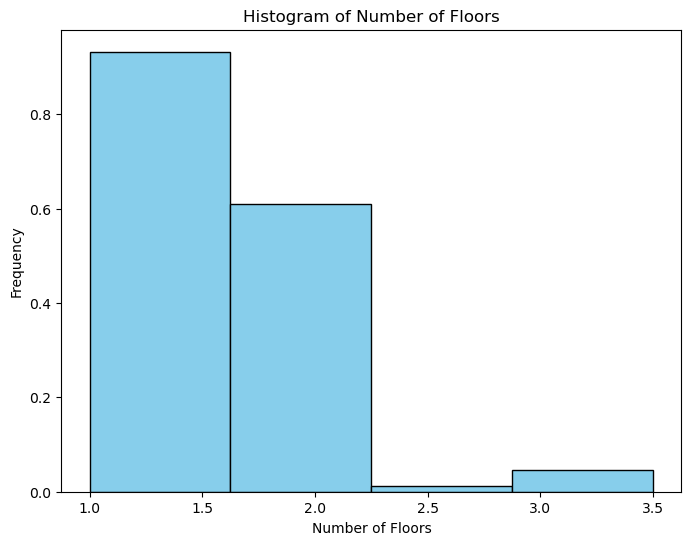

In [127]:
# Create histogram for number of floors
plt.figure(figsize=(8, 6))
plt.hist(housing['num_floors'], bins=4, density= True ,edgecolor='black', color='skyblue')
plt.xlabel('Number of Floors')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Floors')

plt.show()

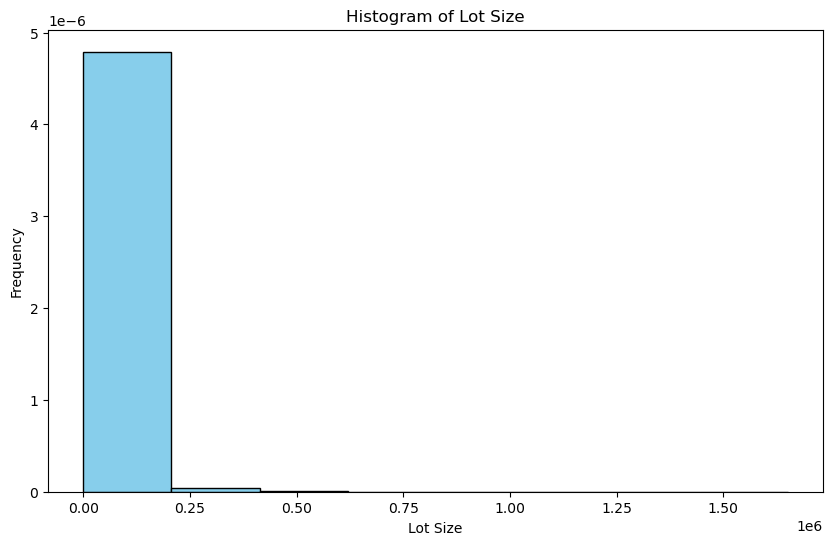

In [123]:

plt.figure(figsize=(10, 6))
plt.hist(housing['lot_size'], bins=8, density= True, edgecolor='black', color='skyblue')
plt.xlabel('Lot Size')
plt.ylabel('Frequency')
plt.title('Histogram of Lot Size')

plt.show()

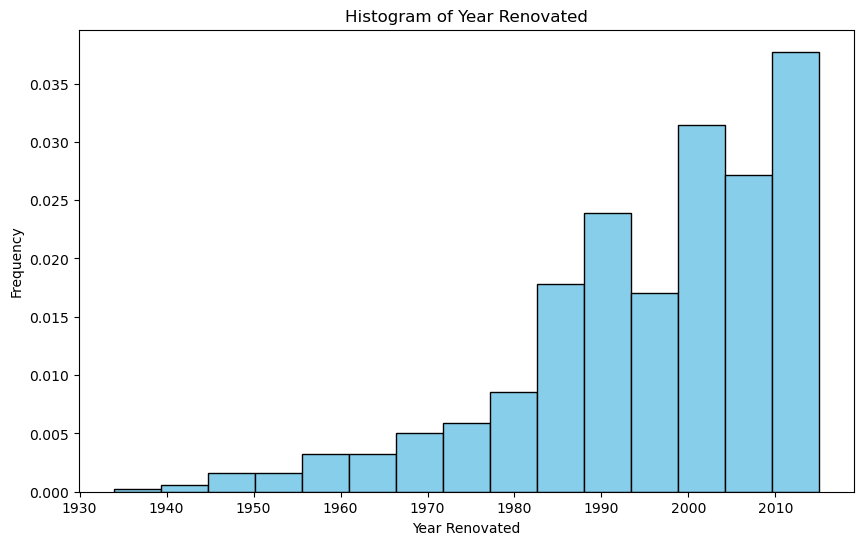

In [124]:
# Drop NA values for plotting
renovated_years = housing['year_renovated'].dropna().dt.year

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(renovated_years, bins=15, density= True, edgecolor='black', color='skyblue')
plt.xlabel('Year Renovated')
plt.ylabel('Frequency')
plt.title('Histogram of Year Renovated')
plt.show()

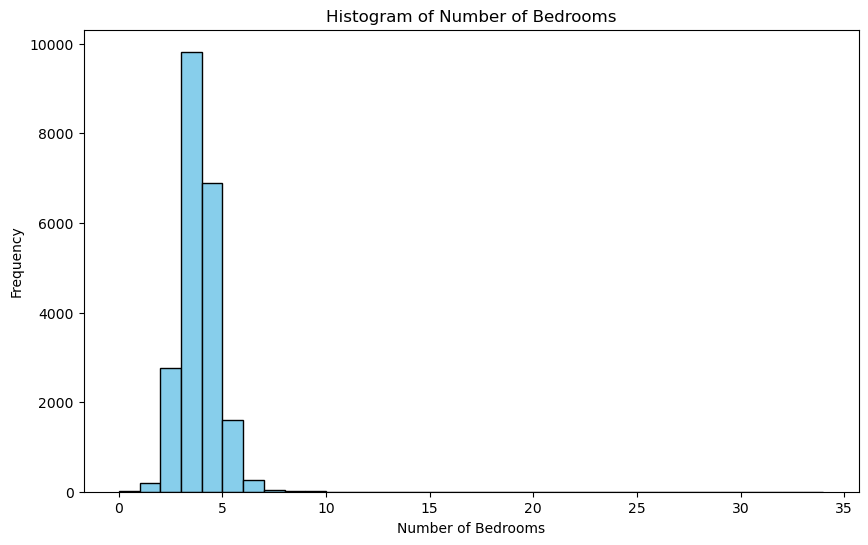

In [54]:

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(housing['num_bedrooms'], bins=range(int(housing['num_bedrooms'].min()), int(housing['num_bedrooms'].max()) + 2), color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bedrooms')

# Show plot
plt.show()

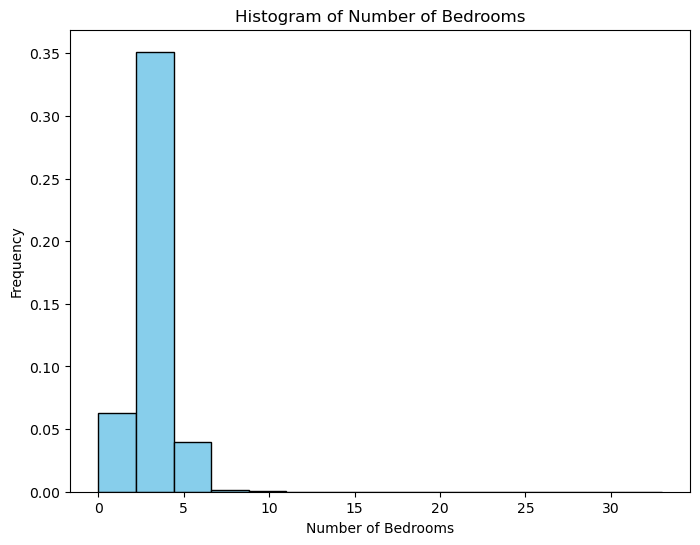

In [125]:

# Create histogram for number of bedrooms
plt.figure(figsize=(8, 6))
plt.hist(housing['num_bedrooms'], bins=15, density= True, edgecolor='black', color='skyblue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bedrooms')

plt.show()

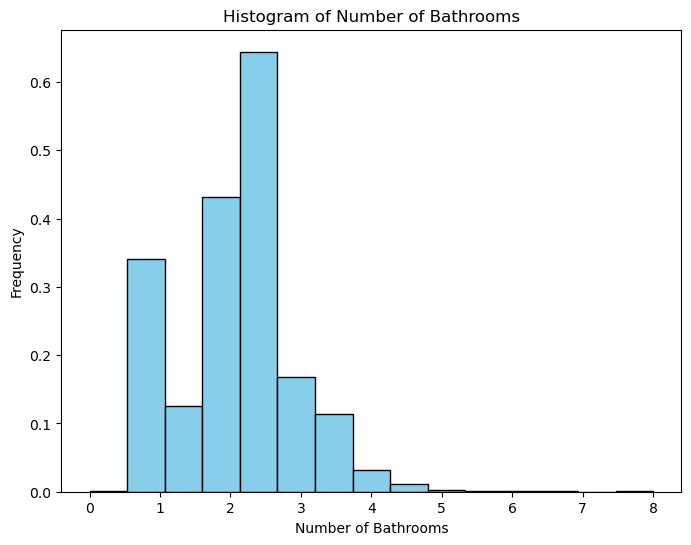

In [126]:
# Create histogram for number of bedrooms
plt.figure(figsize=(8, 6))
plt.hist(housing['num_bathrooms'],density= True ,bins=15, edgecolor='black', color='skyblue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bathrooms')

plt.show()

# # Plotting histogram
# plt.figure(figsize=(10, 6))
# plt.hist(housing['num_bathrooms'], bins=range(int(housing['num_bathrooms'].min()), int(housing['num_bathrooms'].max()) + 2), color='skyblue', edgecolor='black')

# # Set labels and title
# plt.xlabel('Number of Bathrooms')
# plt.ylabel('Frequency')
# plt.title('Histogram of Number of Bathrooms')

# # Show plot
plt.show()

In [37]:
num_unique_zipcodes = housing['zip_code'].nunique()
num_unique_zipcodes

70

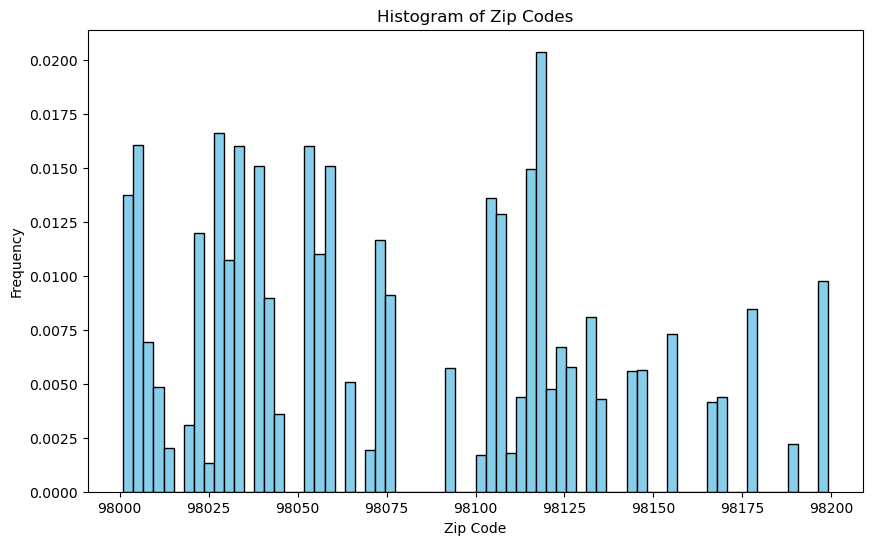

In [128]:
# Number of unique zip codes
num_unique_zipcodes = housing['zip_code'].nunique()

# Creating a histogram of the 'zip_code' column
plt.figure(figsize=(10, 6))
plt.hist(housing['zip_code'], bins=num_unique_zipcodes, density=True, edgecolor='black', color='skyblue')

# Set labels and title
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.title('Histogram of Zip Codes')

plt.show()

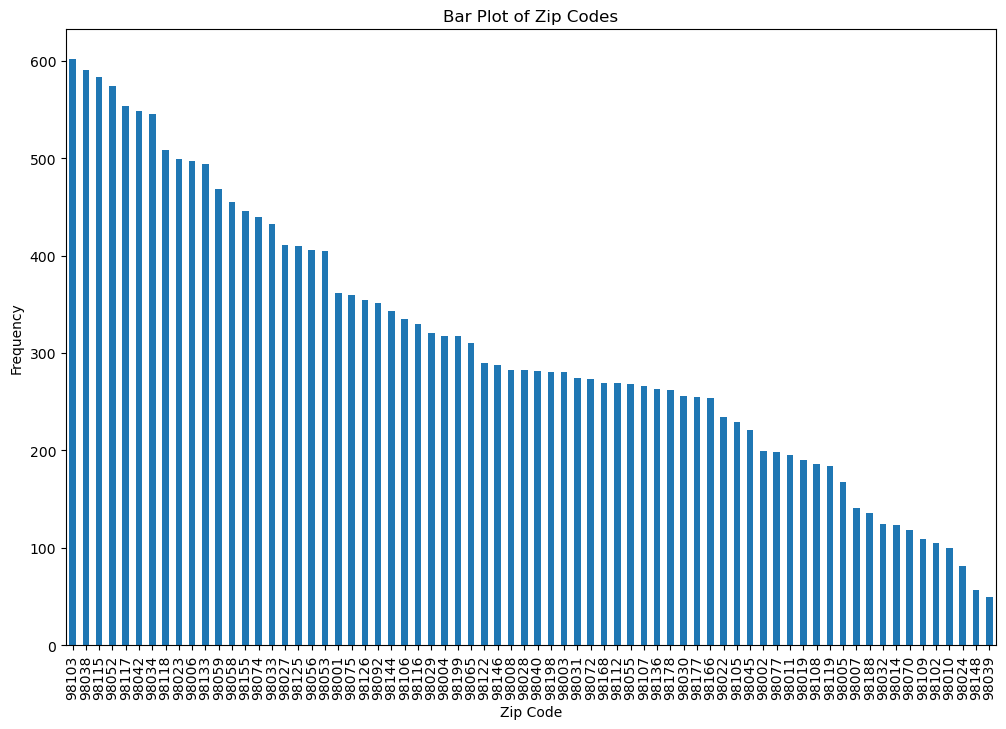

In [85]:
# Create a bar plot for 'zip_code' column
zip_counts = housing['zip_code'].value_counts()


plt.figure(figsize=(12, 8))
zip_counts.plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.title('Bar Plot of Zip Codes')

plt.show()

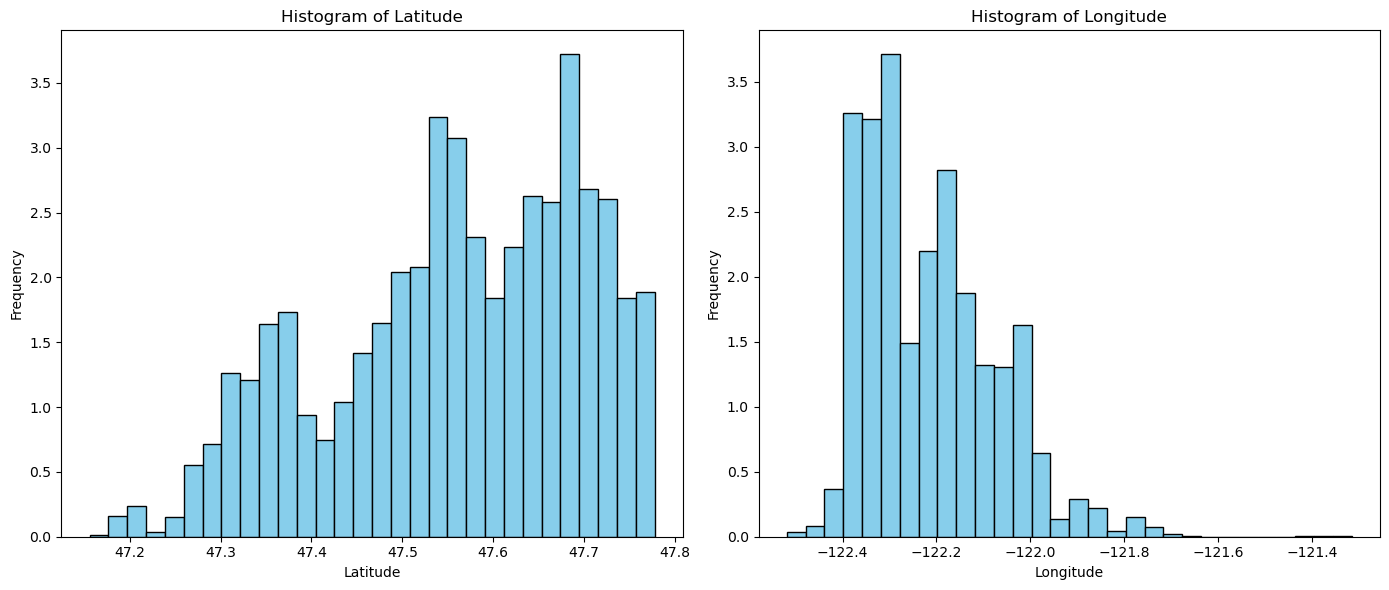

In [131]:
# Creating histograms for lat and longt
plt.figure(figsize=(14, 6))

# Histogram for latitude
plt.subplot(1, 2, 1)
plt.hist(housing['latitude'], bins=30, color='skyblue', density= True, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')

# Histogram for longitude
plt.subplot(1, 2, 2)
plt.hist(housing['longitude'], bins=30, color='skyblue', density=True, edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Longitude')

plt.tight_layout()
plt.show()

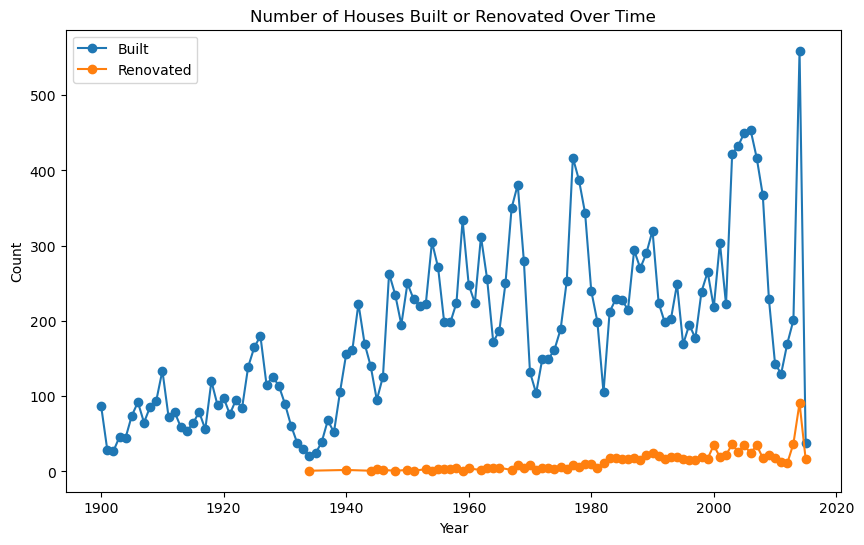

In [17]:
# Convert non-date values to NaN in 'year_renovated' column
housing['year_renovated'] = housing['year_renovated'].replace('0', np.nan)

# Convert 'year_built' and 'year_renovated' columns to datetime
housing['year_built'] = pd.to_datetime(housing['year_built'], format='%Y')
housing['year_renovated'] = pd.to_datetime(housing['year_renovated'], errors='coerce', format='%Y')

# Plot line plot of number of houses built or renovated over time
plt.figure(figsize=(10, 6))
plt.plot(housing['year_built'].dt.year.value_counts().sort_index(), marker='o', label='Built')
plt.plot(housing['year_renovated'].dt.year.value_counts().sort_index(), marker='o', label='Renovated')
plt.title('Number of Houses Built or Renovated Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.show()

In [ ]:
#model=tf.keras.Sequential([
    #tf.keras.layers.Dense(10, activation= 'relu'),
    #tf.keras.layers.Dense(10, activation= 'relu'),
    #tf.keras.layer.Dense(1, activation='linear')